In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import wandb
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [3]:
train_dataset_path = "../datasets/coffee/train"
list_katagori = sorted(os.listdir(train_dataset_path))

list_dataset_training = []
for kategori in sorted(list_katagori):
    path_kategori = os.path.join(train_dataset_path, kategori)
    list_dataset = [
        {'filename': os.path.join(path_kategori, nama_file), "class": kategori}
        for nama_file in sorted(os.listdir(path_kategori))
        if nama_file.endswith(".jpg")
    ]
    list_dataset_training.extend(list_dataset)

dataframe_dataset_training = pd.DataFrame.from_dict(list_dataset_training)
dataframe_dataset_training.head()

,filename,class
0,../datasets/coffee/train/defect/0.jpg,defect
1,../datasets/coffee/train/defect/1.jpg,defect
2,../datasets/coffee/train/defect/10.jpg,defect
3,../datasets/coffee/train/defect/100.jpg,defect
4,../datasets/coffee/train/defect/101.jpg,defect


In [4]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255.0,
)

In [5]:
def plot_images(images, labels=None, rows=4, cols=8, figsize=(16, 8)):
    """
    Plot a list of images in a grid layout.

    Args:
        images (list of ndarrays): List of image arrays to be plotted.
        rows (int): Number of rows in the grid.
        cols (int): Number of columns in the grid.
        figsize (tuple): Figure size in inches.

    Raises:
        ValueError: If the number of images is not equal to rows * cols.
    """
    if len(images) != rows * cols:
        raise ValueError("Number of images must be equal to rows * cols.")

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.1, hspace=0.1)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        if labels is not None:
            ax.set_title(labels[i].tolist())
        ax.axis('off')

    plt.show()

In [6]:
lokasi_model = "../models/2_densenet169_raw-fold_2-best_train.keras"

In [7]:
tf.keras.backend.clear_session()
model = tf.keras.models.load_model(lokasi_model)
model.summary()

Model: "densenet169"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

 n)                                                                                               
                                                                                                  
 conv2_block4_1_conv (Conv2D)   (None, 56, 56, 128)  20480       ['conv2_block4_0_relu[0][0]']    
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 56, 56, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 56, 56, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_blo

 conv3_block2_0_relu (Activatio  (None, 28, 28, 160)  0          ['conv3_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 28, 28, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 28, 28, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 28, 28, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 28, 28, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization) 

 ate)                                                             'conv3_block10_2_conv[0][0]']   
                                                                                                  
 conv3_block11_0_bn (BatchNorma  (None, 28, 28, 448)  1792       ['conv3_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 28, 28, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 28, 28, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_blo

 conv4_block2_concat (Concatena  (None, 14, 14, 320)  0          ['conv4_block1_concat[0][0]',    
 te)                                                              'conv4_block2_2_conv[0][0]']    
                                                                                                  
 conv4_block3_0_bn (BatchNormal  (None, 14, 14, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 14, 14, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 14, 14, 128)  40960       ['conv4_block3_0_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv4_block7_1_conv (Conv2D)   (None, 14, 14, 128)  57344       ['conv4_block7_0_relu[0][0]']    
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 14, 14, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 14, 14, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block11_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 14, 14, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 14, 14, 608)  2432       ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block16_0_bn (BatchNorma  (None, 14, 14, 736)  2944       ['conv4_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_0_relu (Activati  (None, 14, 14, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 14, 14, 128)  94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block16_1_conv[0][0]']   
 lization)

 conv4_block20_1_conv (Conv2D)  (None, 14, 14, 128)  110592      ['conv4_block20_0_relu[0][0]']   
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_concat (Concaten  (None, 14, 14, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 conv4_block25_0_bn (BatchNorma  (None, 14, 14, 1024  4096       ['conv4_block24_concat[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block25_0_relu (Activati  (None, 14, 14, 1024  0          ['conv4_block25_0_bn[0][0]']     
 on)      

 lization)                      )                                                                 
                                                                                                  
 conv4_block29_0_relu (Activati  (None, 14, 14, 1152  0          ['conv4_block29_0_bn[0][0]']     
 on)                            )                                                                 
                                                                                                  
 conv4_block29_1_conv (Conv2D)  (None, 14, 14, 128)  147456      ['conv4_block29_0_relu[0][0]']   
                                                                                                  
 conv4_block29_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block29_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 pool4_pool (AveragePooling2D)  (None, 7, 7, 640)    0           ['pool4_conv[0][0]']             
                                                                                                  
 conv5_block1_0_bn (BatchNormal  (None, 7, 7, 640)   2560        ['pool4_pool[0][0]']             
 ization)                                                                                         
                                                                                                  
 conv5_block1_0_relu (Activatio  (None, 7, 7, 640)   0           ['conv5_block1_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block1_1_conv (Conv2D)   (None, 7, 7, 128)    81920       ['conv5_block1_0_relu[0][0]']    
                                                                                                  
 conv5_blo

                                                                                                  
 conv5_block5_1_conv (Conv2D)   (None, 7, 7, 128)    98304       ['conv5_block5_0_relu[0][0]']    
                                                                                                  
 conv5_block5_1_bn (BatchNormal  (None, 7, 7, 128)   512         ['conv5_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block5_1_relu (Activatio  (None, 7, 7, 128)   0           ['conv5_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block5_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv5_block5_1_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv5_block9_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv5_block9_1_relu[0][0]']    
                                                                                                  
 conv5_block9_concat (Concatena  (None, 7, 7, 928)   0           ['conv5_block8_concat[0][0]',    
 te)                                                              'conv5_block9_2_conv[0][0]']    
                                                                                                  
 conv5_block10_0_bn (BatchNorma  (None, 7, 7, 928)   3712        ['conv5_block9_concat[0][0]']    
 lization)                                                                                        
                                                                                                  
 conv5_blo

 conv5_block14_0_bn (BatchNorma  (None, 7, 7, 1056)  4224        ['conv5_block13_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block14_0_relu (Activati  (None, 7, 7, 1056)  0           ['conv5_block14_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block14_1_conv (Conv2D)  (None, 7, 7, 128)    135168      ['conv5_block14_0_relu[0][0]']   
                                                                                                  
 conv5_block14_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block14_1_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv5_block18_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block18_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block18_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block18_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block18_2_conv (Conv2D)  (None, 7, 7, 32)     36864       ['conv5_block18_1_relu[0][0]']   
                                                                                                  
 conv5_block18_concat (Concaten  (None, 7, 7, 1216)  0           ['conv5_block17_concat[0][0]',   
 ate)     

 conv5_block22_2_conv (Conv2D)  (None, 7, 7, 32)     36864       ['conv5_block22_1_relu[0][0]']   
                                                                                                  
 conv5_block22_concat (Concaten  (None, 7, 7, 1344)  0           ['conv5_block21_concat[0][0]',   
 ate)                                                             'conv5_block22_2_conv[0][0]']   
                                                                                                  
 conv5_block23_0_bn (BatchNorma  (None, 7, 7, 1344)  5376        ['conv5_block22_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block23_0_relu (Activati  (None, 7, 7, 1344)  0           ['conv5_block23_0_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv5_block27_0_relu (Activati  (None, 7, 7, 1472)  0           ['conv5_block27_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block27_1_conv (Conv2D)  (None, 7, 7, 128)    188416      ['conv5_block27_0_relu[0][0]']   
                                                                                                  
 conv5_block27_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block27_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block27_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block27_1_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv5_block31_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block31_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block31_2_conv (Conv2D)  (None, 7, 7, 32)     36864       ['conv5_block31_1_relu[0][0]']   
                                                                                                  
 conv5_block31_concat (Concaten  (None, 7, 7, 1632)  0           ['conv5_block30_concat[0][0]',   
 ate)                                                             'conv5_block31_2_conv[0][0]']   
                                                                                                  
 conv5_blo

In [8]:
batch_size = 32
all_data_generator = test_generator.flow_from_dataframe(
    dataframe_dataset_training,
    x_col='filename',
    y_col='class',
    class_mode='categorical',
    classes=list_katagori,
    batch_size=batch_size,
    shuffle=False,
)

Found 1200 validated image filenames belonging to 4 classes.


In [9]:
eval_results = model.evaluate(all_data_generator)
print(dict(zip(model.metrics_names, eval_results)))

38/38 [==============================] - 9s 80ms/step - loss: 0.1450 - accuracy: 0.9442 - precision: 0.9558 - recall: 0.9367
{'loss': 0.14496712386608124, 'accuracy': 0.9441666603088379, 'precision': 0.9557822942733765, 'recall': 0.9366666674613953}


In [10]:
hasil_prediksi = model.predict(all_data_generator)
print(hasil_prediksi.shape)

38/38 [==============================] - 5s 49ms/step
(1200, 4)


In [11]:
ground_truth = None
for idxs in range(len(all_data_generator)):
    _, labels = next(all_data_generator)
    if ground_truth is None:
        ground_truth = labels
    else:
        ground_truth = tf.concat([ground_truth, labels], axis=0)
    
    if labels.shape[0] == 0:
        break
    
print(ground_truth.shape)


(1200, 4)


In [12]:
import numpy as np

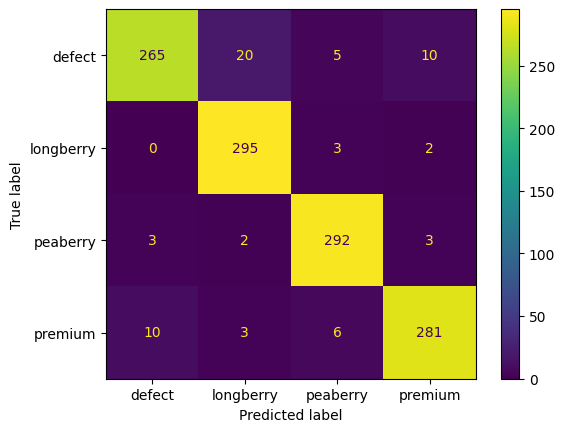

In [13]:
y_pred = np.argmax(hasil_prediksi, axis=1)
y_gt = np.argmax(ground_truth, axis=1)

cm = confusion_matrix(y_gt, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list_katagori)
disp.plot()
plt.show()

In [14]:
print(classification_report(y_gt, y_pred, target_names=list_katagori))

              precision    recall  f1-score   support

      defect       0.95      0.88      0.92       300
   longberry       0.92      0.98      0.95       300
    peaberry       0.95      0.97      0.96       300
     premium       0.95      0.94      0.94       300

    accuracy                           0.94      1200
   macro avg       0.94      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200

